# 프로젝트 설명

- 이번 프로젝트의 목적은 자동차 데이터를 활용하여 회귀에 대한 이해도를 높이고 높은 R2점수를 획득하는 것에 있습니다.
- 자동차의 가격, 주행거리, 연료 타입 등을 바탕으로 여러가지 분석을 진행해 볼 수 있습니다.
- 회귀 분석은 데이터 세트의 변수 간 관계를 발견하는 방법입니다. 특히 예측과 관련하여 광범위한 문제를 해결하기 위해 많이 사용하게 됩니다.


# 데이터 설명
www.cardekho.com 웹사이트에서 수집된 자동차에 대한 데이터입니다.

* Car_Name : 자동차의 이름 
* Year : 자동차 구매연도
* Selling_Price : 첫 판매 가격
* Present_Price : 현재 가격
* Kms_Driven : 주행 거리
* Fuel_Type : 연료 타입 (petrol / disel / CNG / LPG / electric)
* Seller_Type : 판매자 타입 (Indivisual / Dealer)
* Transmission : 기어 변속기 (Automatic / Manual)
* Owner : 소유자 변경 횟수 (First Owner / Second Owner / Third Owner / Fourth & Above Owner)

## 데이터 불러오기

In [149]:
## 상품 수령울 위한 이름과 연락처를 주석으로 입력해주세요.
## 이름 : 
## 연락처 :


In [150]:
## 필요한 패키지를 import 해 보세요.
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import  linear_model


In [151]:
## 주어진 파일명을 활용하여 데이터를 불러와 할당해 보세요. (car data.csv)
data = pd.read_csv('car data.csv')



In [152]:
## 데이터의 형태와 결측치 등을 확인해 보세요.
print("======See Dataset======")
print(data.describe())
print("\n======See Missing Values======")
print(data.isnull().sum())
print("\n======See Data Types======")
print(data.dtypes)
print("\n======See First-5 Rows======")
data.head()

======See Dataset======
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

======See Missing Values======
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

======See Data Types======
Car_Name          object
Year               int6

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## 탐색적 데이터 분석(EDA)
데이터를 시각화 하며 탐색해 보겠습니다.

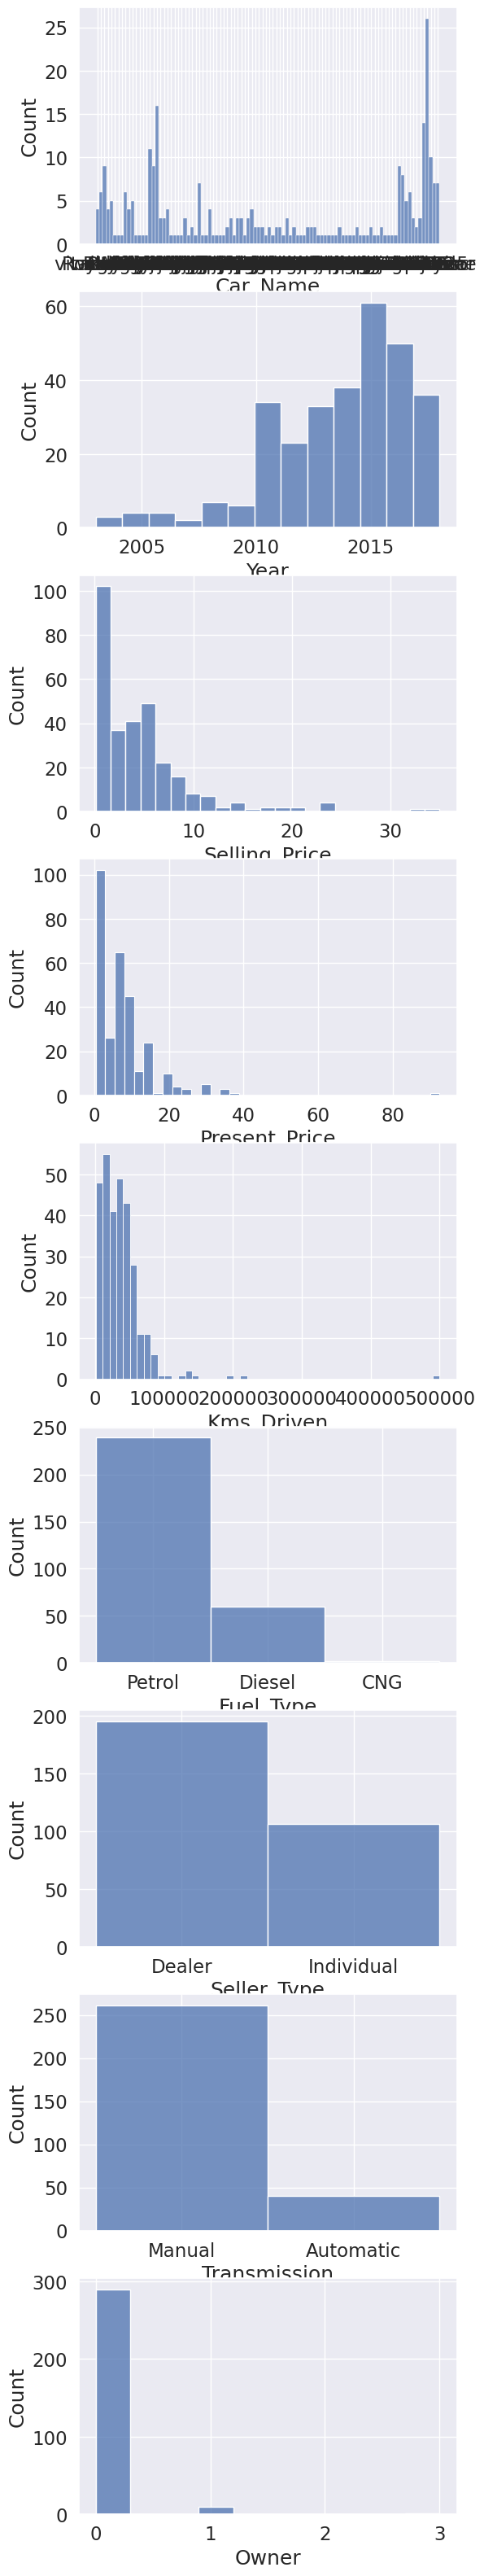

In [153]:
## 각각의 변수에 대해 시각화를 통해 특성을 파악해 보세요.

# View Histogram
fig, ax = plt.subplots(nrows=len(data.columns), figsize=(6, 40))
for idx, col in enumerate(data.columns):
    sns.histplot(data[col], ax=ax[idx])



In [154]:
## 범주형 변수를 수치형 변수로 변환해 보세요
# Categorical Vars : Car_Name, Fuel_Type, Seller_Type, Transmission
car_name_list = list(set(data.Car_Name.tolist()))
data['Car_Name'].replace(car_name_list, [car_name_list.index(name) for name in car_name_list], inplace=True)

fuel_type_list = list(set(data.Fuel_Type.tolist()))
data['Fuel_Type'].replace(fuel_type_list, [fuel_type_list.index(name) for name in fuel_type_list], inplace=True)

seller_type_list = list(set(data.Seller_Type.tolist()))
data['Seller_Type'].replace(seller_type_list, [seller_type_list.index(name) for name in seller_type_list], inplace=True)

transmission_list = list(set(data.Transmission.tolist()))
data['Transmission'].replace(transmission_list, [transmission_list.index(name) for name in transmission_list], inplace=True)

data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,83,2014,3.35,5.59,27000,0,0,0,0
1,11,2013,4.75,9.54,43000,1,0,0,0
2,22,2017,7.25,9.85,6900,0,0,0,0
3,39,2011,2.85,4.15,5200,0,0,0,0
4,30,2014,4.60,6.87,42450,1,0,0,0


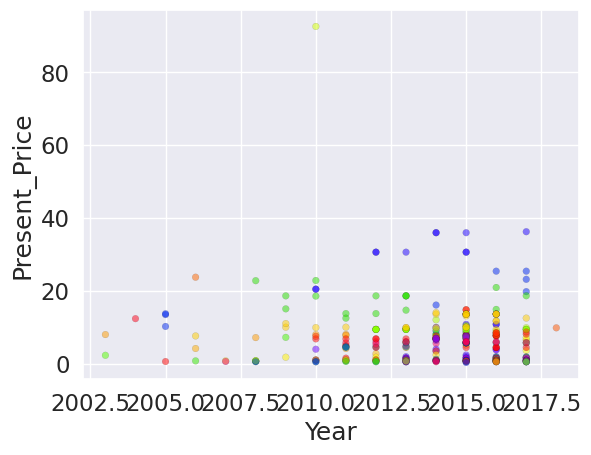

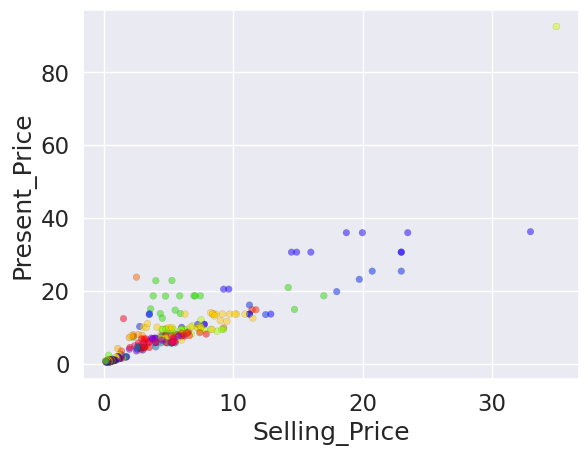

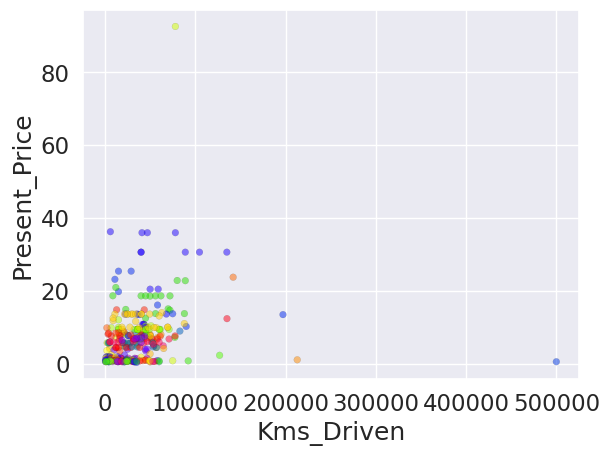

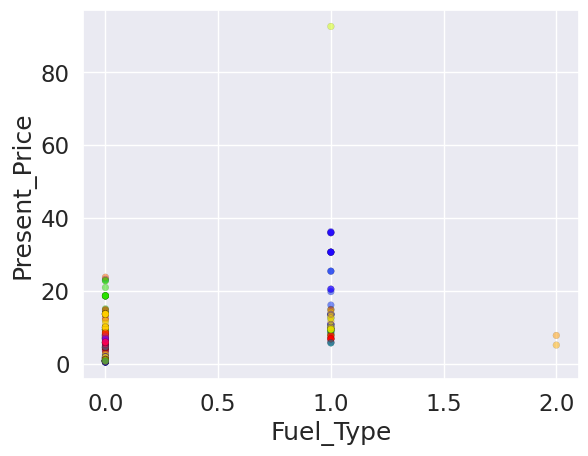

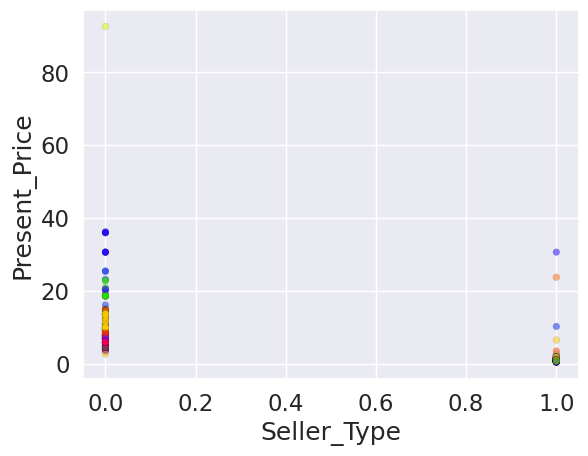

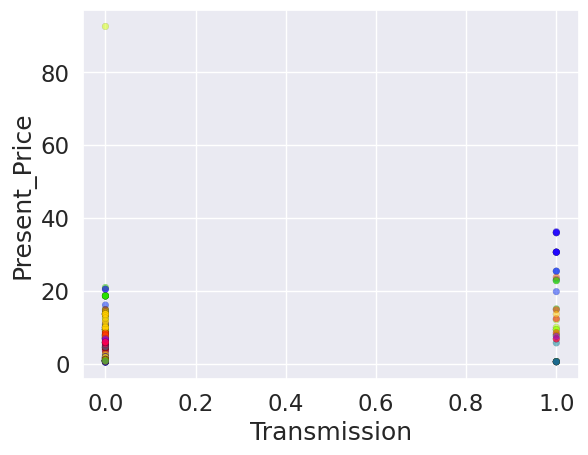

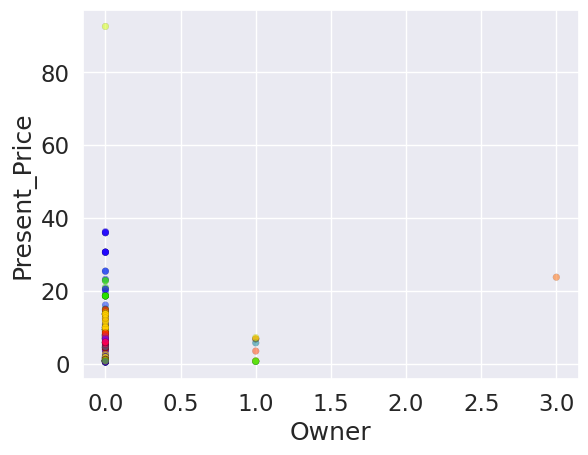

In [155]:
## 데이터 셋의 상관관계를 시각화하여 확인해 보세요.
# View Histogram
for idx, col in enumerate(data.columns):
    if col in ["Car_Name", "Present_Price"]:
        continue
    plt.scatter(data[col], data['Present_Price'], c=data['Car_Name'], s=24, edgecolors='black', linewidth=0.1, \
        cmap=plt.cm.get_cmap('prism', data['Car_Name'].nunique()), alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Present_Price')
    plt.show()


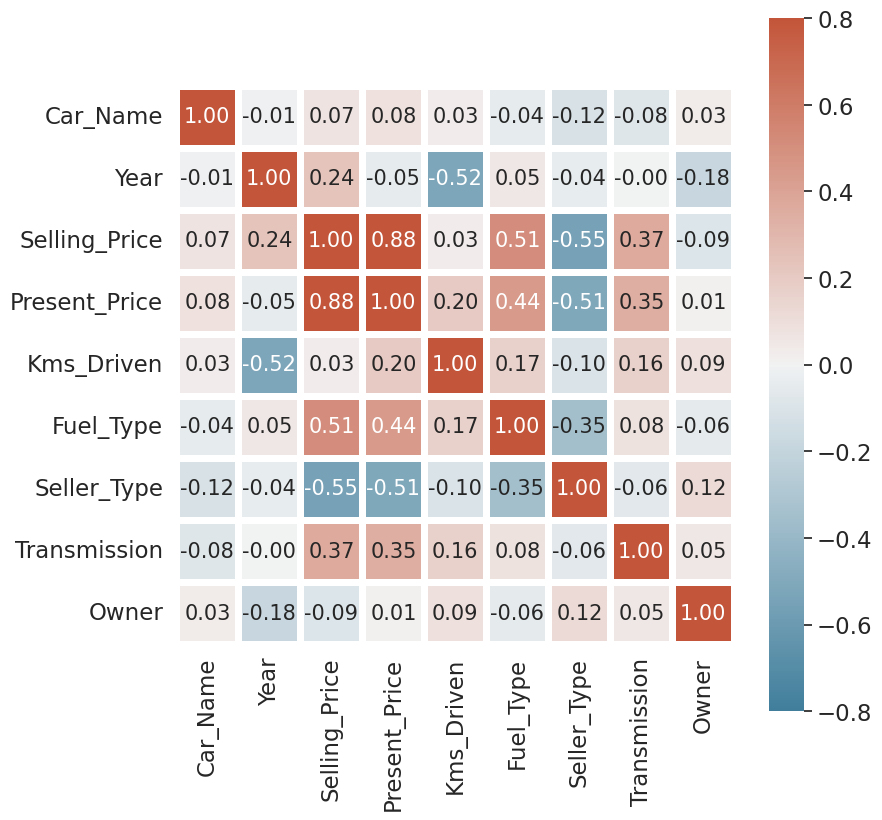

In [156]:
cols = data.columns
cm = data.corr()
f, ax = plt.subplots(figsize=(9, 9))
sns.set(font_scale=1.5)
heatmap = sns.heatmap(cm,
                      cbar=True,
                      annot=True,
                      square=True,
                      fmt='.2f',
                      vmin=-.8,
                      vmax=.8,
                      annot_kws={'size': 15},
                      linewidths=5,
                      cmap = sns.diverging_palette(230, 20, as_cmap=True),
                      yticklabels=cols,
                      xticklabels=cols)

## 모델링

In [157]:
## 데이터를 스케일링 하고 트레인 셋과 테스트 셋으로 나누어 보세요.

# Feature Selection
data_final = data[['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Transmission']]
data_final.head()

# Data Scaling
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(data_final)
print(fitted.data_max_)

dataset = min_max_scaler.transform(data_final)
dataset = pd.DataFrame(dataset, columns=data_final.columns, index=list(data_final.index))

print(dataset.head())

# Train/Test Splitting
X = dataset.drop(['Present_Price'], axis=1)
y = dataset['Present_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


print("X_train's shape : ", X_train.shape)
print("X_test's shape : ", X_test.shape)
print("y_train's shape : ", y_train.shape)
print("y_test's shape : ", y_test.shape)



[3.50e+01 9.26e+01 5.00e+05 2.00e+00 1.00e+00]
   Selling_Price  Present_Price  Kms_Driven  Fuel_Type  Transmission
0       0.093123       0.057109    0.053053        0.0           0.0
1       0.133238       0.099913    0.085085        0.5           0.0
2       0.204871       0.103273    0.012813        0.0           0.0
3       0.078797       0.041504    0.009409        0.0           0.0
4       0.128940       0.070980    0.083984        0.5           0.0
X_train's shape :  (240, 4)
X_test's shape :  (61, 4)
y_train's shape :  (240,)
y_test's shape :  (61,)


In [158]:
## 선형 회귀 모델을 통해 여러가지 변수들의 관계를 파악해 보세요.

preds = []
alpha = [.0001, .001, .01, .1, 10, 100]
for a in alpha:
    reg = linear_model.Ridge(alpha=a).fit(X_train, y_train)
    preds.append(reg.predict(X_test))
#print("=====Result=====")
#print(np.array(y_test), np.array(reg_pred))


In [159]:
## 모델을 평가하고 해석해 보세요.

for a, reg_pred in zip(alpha, preds):
    r2 = r2_score(y_test, reg_pred)
    print("alpha = ", a, ", R2 score = ", r2)


alpha =  0.0001 , R2 score =  0.8640967423416128
alpha =  0.001 , R2 score =  0.8641353185149871
alpha =  0.01 , R2 score =  0.864516171832597
alpha =  0.1 , R2 score =  0.8678658913566552
alpha =  10 , R2 score =  0.7028285641766668
alpha =  100 , R2 score =  0.223617740892201
